# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"
city_url = url + '&q=' + cities[0]
response = requests.get(city_url).json()
pprint.pprint(response)

{'base': 'stations',
 'clouds': {'all': 31},
 'cod': 200,
 'coord': {'lat': -0.6136, 'lon': -47.3561},
 'dt': 1720147662,
 'id': 3389822,
 'main': {'feels_like': 26.48,
          'grnd_level': 1011,
          'humidity': 88,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 25.57,
          'temp_max': 25.57,
          'temp_min': 25.57},
 'name': 'Salinópolis',
 'sys': {'country': 'BR', 'sunrise': 1720084270, 'sunset': 1720127778},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 92, 'gust': 5.35, 'speed': 4.32}}


In [13]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salinopolis
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | wanlaweyn
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | abomsa
Processing Record 8 of Set 1 | puerto santa
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | arenas de san pedro
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | shimoda
Processing Record 15 of Set 1 | badger
Processing Record 16 of Set 1 | peterhead
Processing Record 17 of Set 1 | lihue
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | playa del ingles
Processing Record 20 of Set 1 | ulsteinvik
Processing Record 21 of Set 1 | edinburgh of the seven seas
Pro

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salinopolis,-0.6136,-47.3561,25.57,88,31,4.32,BR,1720147662
1,yellowknife,62.4560,-114.3525,17.29,67,75,4.63,CA,1720147424
2,wanlaweyn,2.6185,44.8938,23.32,85,90,4.66,SO,1720147670
3,port mathurin,-19.6833,63.4167,22.62,60,85,9.99,MU,1720147671
4,iqaluit,63.7506,-68.5145,3.85,93,100,2.06,CA,1720147672


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salinopolis,-0.6136,-47.3561,25.57,88,31,4.32,BR,1720147662
1,yellowknife,62.4560,-114.3525,17.29,67,75,4.63,CA,1720147424
2,wanlaweyn,2.6185,44.8938,23.32,85,90,4.66,SO,1720147670
3,port mathurin,-19.6833,63.4167,22.62,60,85,9.99,MU,1720147671
4,iqaluit,63.7506,-68.5145,3.85,93,100,2.06,CA,1720147672


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

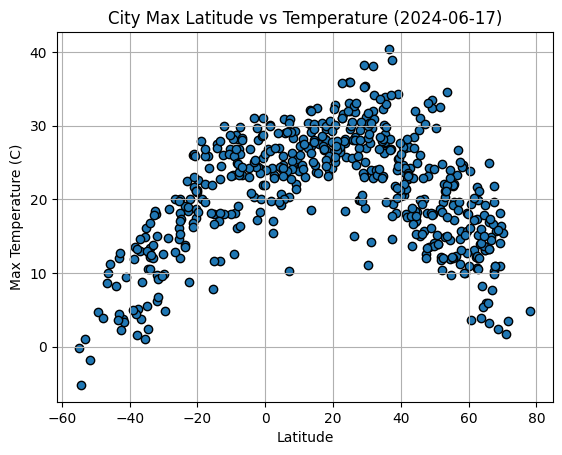

In [20]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lat, temp,edgecolors="black")
# Incorporate the other graph properties
plt.title('City Max Latitude vs Temperature (2024-06-17)')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

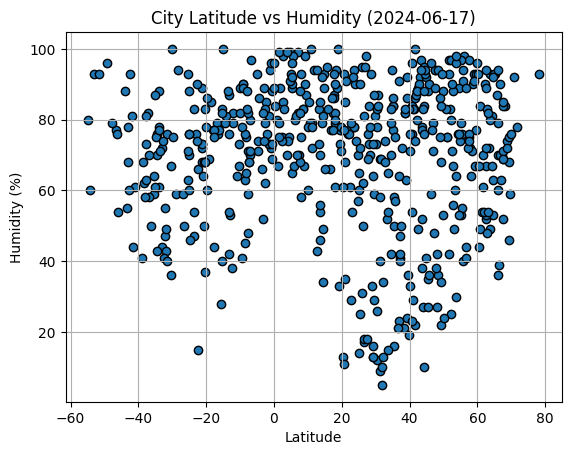

In [23]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']
plt.scatter(lat, humidity,edgecolors="black") 
# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (2024-06-17)')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

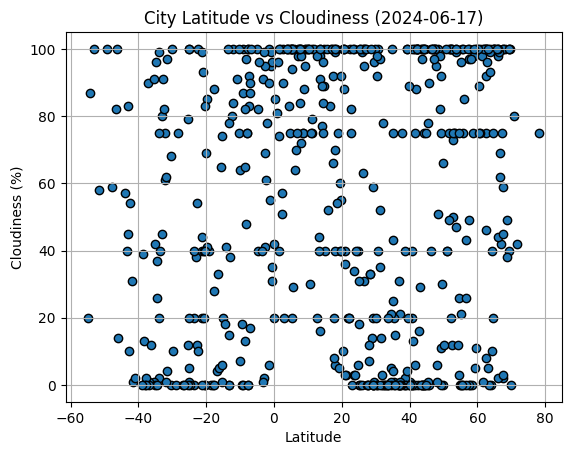

In [24]:
# Build the scatter plots for latitude vs. cloudiness
cloud = city_data_df['Cloudiness']
plt.scatter(lat, cloud,edgecolors="black") 

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (2024-06-17)')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

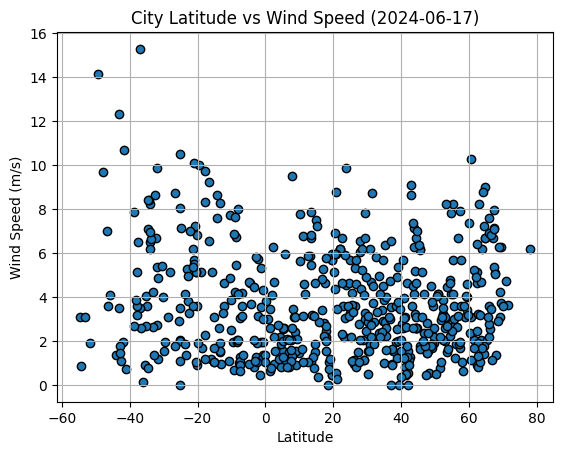

In [25]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df['Wind Speed']
plt.scatter(lat, wind,edgecolors="black") 

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (2024-06-17)')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [49]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title):
    # Convert x and y to NumPy arrays to ensure consistent dimensions
    x = np.array(x)
    y = np.array(y)
    
    # Check dimensions of x and y
    if x.shape != y.shape:
        raise ValueError("Arrays x and y must have the same shape.")
    
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")

    # Annotate the linear regression equation on the plot
    plt.annotate(line_eq, (min(x), min(y)), fontsize=15, color="red")

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f'The r^2-value is:{rvalue**2}')

    # Show plot
    plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,17.29,67,75,4.63,CA,1720147424
2,wanlaweyn,2.6185,44.8938,23.32,85,90,4.66,SO,1720147670
4,iqaluit,63.7506,-68.5145,3.85,93,100,2.06,CA,1720147672
5,abomsa,9.9833,39.9833,23.84,60,100,1.47,ET,1720147675
7,hawaiian paradise park,19.5933,-154.9731,27.73,73,40,5.66,US,1720147677


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salinopolis,-0.6136,-47.3561,25.57,88,31,4.32,BR,1720147662
3,port mathurin,-19.6833,63.4167,22.62,60,85,9.99,MU,1720147671
6,puerto santa,-8.9906,-78.6456,18.22,90,87,4.23,PE,1720147676
16,ancud,-41.8697,-73.8203,3.83,81,31,1.93,CL,1720147688
19,edinburgh of the seven seas,-37.0676,-12.3116,13.05,82,90,15.27,SH,1720147691


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is:0.36355051924161214


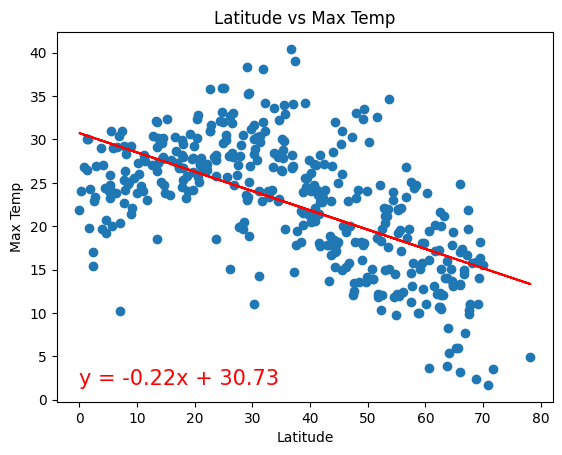

In [52]:
# Linear regression on Northern Hemisphere
lat_north = northern_hemi_df['Lat']
temp_north = northern_hemi_df['Max Temp']
plot_linear_regression(lat_north, temp_north, 'Latitude', 'Max Temp', 'Latitude vs Max Temp')

The r^2-value is:0.681082265000677


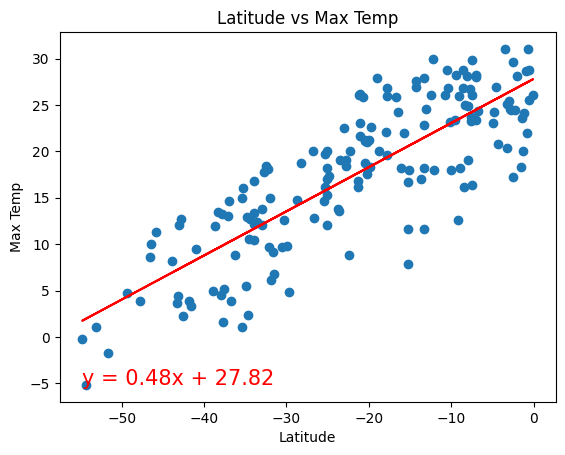

In [53]:
# Linear regression on Southern Hemisphere
lat_south = southern_hemi_df['Lat']
temp_south = southern_hemi_df['Max Temp']
plot_linear_regression(lat_south, temp_south, 'Latitude', 'Max Temp', 'Latitude vs Max Temp')

**Discussion about the linear relationship:** The northern hemisphere's latitude and max temperature regression seems to have a negative correlation based on the linear regression line, however since the r^2 value is near 0.36, the line represents a very low percentage of the data so this correlation is not accurate. The southern hemisphere on the other hand has a positive correlation between the latitude and max temperature, with the r^2 value being around 0.68, meaning that the regression line fits around 68 percent of the data so we can conclude that there is a positive correlation between the values. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is:0.004436613167470308


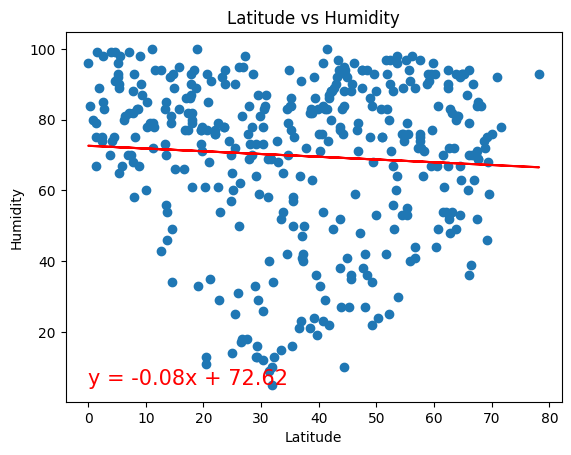

In [54]:
# Northern Hemisphere
humidity_north = northern_hemi_df['Humidity']
plot_linear_regression(lat_north, humidity_north, 'Latitude', 'Humidity', 'Latitude vs Humidity')

The r^2-value is:0.021211478938065517


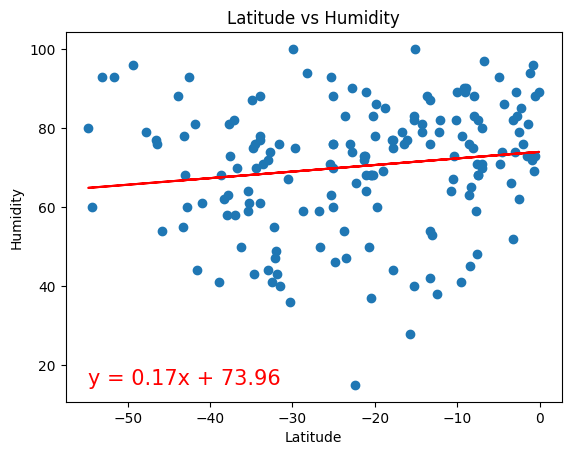

In [55]:
# Southern Hemisphere
humidity_south = southern_hemi_df['Humidity']
plot_linear_regression(lat_south, humidity_south, 'Latitude', 'Humidity', 'Latitude vs Humidity')

**Discussion about the linear relationship:** The linear relationship between latitude and humidity for both the northern and southern hemisphere can't be determine since the r^2 value for both are less than 0.03 which means that both regression line fits less than 3 percent of the data. Since the regression line fits so little of the data we cannot accurate tell the correlation between the values. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is:0.005170789465825802


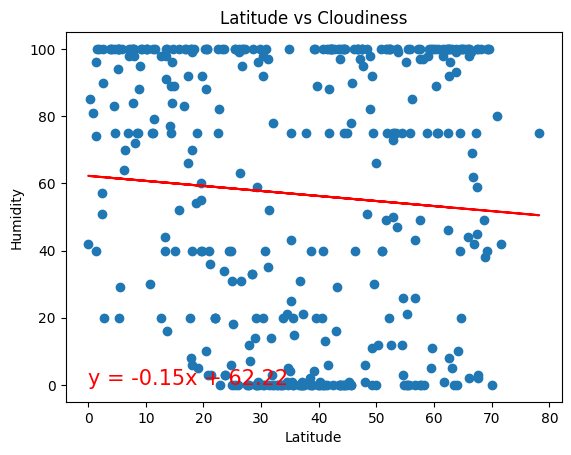

In [56]:
# Northern Hemisphere
cloud_north = northern_hemi_df['Cloudiness']
plot_linear_regression(lat_north, cloud_north, 'Latitude', 'Humidity', 'Latitude vs Cloudiness')

The r^2-value is:0.028661271758661618


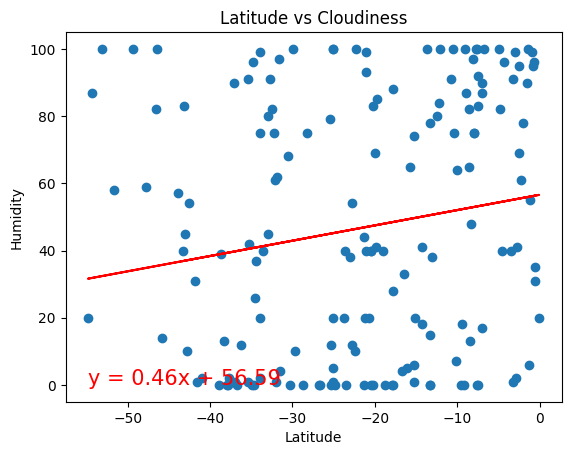

In [57]:
# Southern Hemisphere
cloud_south = southern_hemi_df['Cloudiness']
plot_linear_regression(lat_south, cloud_south, 'Latitude', 'Humidity', 'Latitude vs Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is:0.020407838979265052


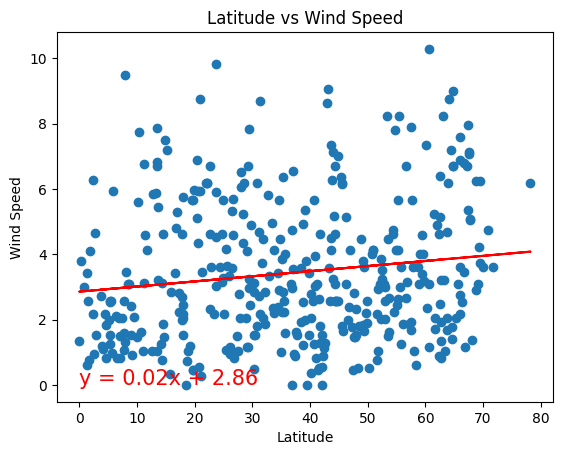

In [58]:
# Northern Hemisphere
wind_north = northern_hemi_df['Wind Speed']
plot_linear_regression(lat_north, wind_north, 'Latitude', 'Wind Speed', 'Latitude vs Wind Speed')

The r^2-value is:0.049846065033834916


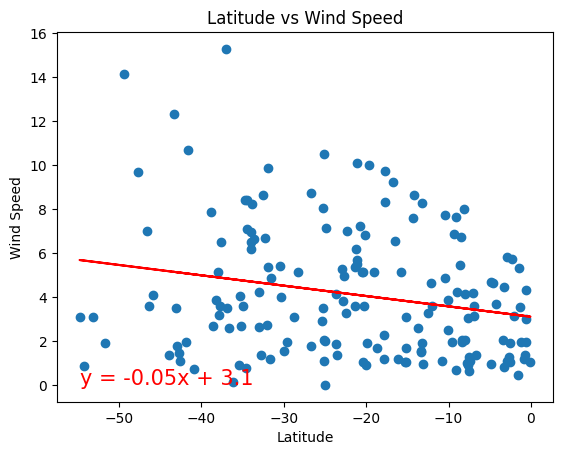

In [59]:
# Southern Hemisphere
wind_south = southern_hemi_df['Wind Speed']
plot_linear_regression(lat_south, wind_south, 'Latitude', 'Wind Speed', 'Latitude vs Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE